In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
coordinates

[(69.3129254227506, 168.34514659910286),
 (-78.7117047168395, -158.51592180339387),
 (-34.43321322150947, 54.42713435512951),
 (-53.366811409099505, 41.87909275058118),
 (-38.82418938197235, 58.784946433722524),
 (47.50102261873059, -44.05739293074109),
 (-84.02759384871088, 101.13815940827499),
 (49.746019652185794, 133.60580785910008),
 (84.6095509548799, -104.72526137825794),
 (61.473149784810516, -148.01483412732665),
 (77.84523654573965, 24.729510393158165),
 (1.032145961864856, 117.0887347080104),
 (-10.388036886792364, 130.19854405001587),
 (80.72644261674097, 65.93536172998719),
 (2.527411065114279, 95.34727294973777),
 (39.75554727680151, 167.72347796475145),
 (-84.97650699840074, 163.04604823249434),
 (18.82789897854113, -125.35577466941845),
 (10.187256131192072, 77.82952929258067),
 (8.434683794843352, -71.92619720359635),
 (-3.9141683749517426, 179.17410932156884),
 (-59.63363527169207, 19.441453106699385),
 (-68.5599140510821, -104.49802750979418),
 (50.403589244163555, -

In [20]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_country = city_weather["sys"]["country"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # Adding Weather description
        weather_descriptin = city_weather["weather"][0]["description"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | birobidzhan
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | havoysund
Processing Record 12 of Set 1 | bontang
Processing Record 13 of Set 1 | nguiu
City not found. Skipping...
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | meulaboh
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | nilakkottai
Processing Record 20 of Set 1 | el vigia
Processing Record 21 of Set 1 | lol

Processing Record 36 of Set 4 | pontes e lacerda
Processing Record 37 of Set 4 | avarua
Processing Record 38 of Set 4 | filotion
Processing Record 39 of Set 4 | baturaja
Processing Record 40 of Set 4 | kahului
Processing Record 41 of Set 4 | zhitnevo
Processing Record 42 of Set 4 | zaraza
Processing Record 43 of Set 4 | tres arroyos
Processing Record 44 of Set 4 | watsa
Processing Record 45 of Set 4 | chapada dos guimaraes
Processing Record 46 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | vernon
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | znamenskoye
Processing Record 2 of Set 5 | ekhabi
Processing Record 3 of Set 5 | newport
Processing Record 4 of Set 5 | general roca
Processing Record 5 of Set 5 | cabo rojo
Processing Record 6 of Set 5 | manassas park
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 

Processing Record 29 of Set 8 | mareeba
Processing Record 30 of Set 8 | arteaga
Processing Record 31 of Set 8 | banmo
City not found. Skipping...
Processing Record 32 of Set 8 | pita
Processing Record 33 of Set 8 | taburi
City not found. Skipping...
Processing Record 34 of Set 8 | labrea
Processing Record 35 of Set 8 | erzin
Processing Record 36 of Set 8 | sapa
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | barawe
City not found. Skipping...
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | nyaunglebin
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | shestakovo
Processing Record 43 of Set 8 | trapani
Processing Record 44 of Set 8 | martapura
Processing Record 45 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 46 of Set 8 | bombay
Processing Record 47 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 8 | clyde river
Processing Record 49 of Set 8 | mariara
Processing Record 

Processing Record 14 of Set 12 | ouadda
Processing Record 15 of Set 12 | robertsport
Processing Record 16 of Set 12 | port hedland
Processing Record 17 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 12 | doha
Processing Record 19 of Set 12 | mount isa
Processing Record 20 of Set 12 | reconquista
Processing Record 21 of Set 12 | sihora
Processing Record 22 of Set 12 | shetpe
Processing Record 23 of Set 12 | sibolga
Processing Record 24 of Set 12 | cherepovets
Processing Record 25 of Set 12 | gouyave
Processing Record 26 of Set 12 | chissamba
Processing Record 27 of Set 12 | libreville
Processing Record 28 of Set 12 | bad salzungen
Processing Record 29 of Set 12 | belousovka
Processing Record 30 of Set 12 | pictou
Processing Record 31 of Set 12 | seminole
Processing Record 32 of Set 12 | salalah
Processing Record 33 of Set 12 | santa vitoria do palmar
Processing Record 34 of Set 12 | synya
Processing Record 35 of Set 12 | gazojak
Processing Record 36 of Set

In [27]:
len(city_data)

577

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-10-24 18:23:49,69.7008,170.3133,7.18,94,100,2.13
1,Mataura,NZ,2021-10-24 18:32:04,-46.1927,168.8643,53.35,90,99,0.78
2,East London,ZA,2021-10-24 18:35:24,-33.0153,27.9116,59.94,77,40,4.61
3,Saint-Philippe,RE,2021-10-24 18:32:57,-21.3585,55.7679,76.59,84,39,12.95
4,Torbay,CA,2021-10-24 18:25:38,47.6666,-52.7314,60.49,94,90,20.71
5,Albany,US,2021-10-24 18:32:22,42.6001,-73.9662,58.80,60,73,1.99
6,Birobidzhan,RU,2021-10-24 18:35:25,48.8000,132.9500,39.06,69,6,3.22
7,Yellowknife,CA,2021-10-24 18:35:25,62.4560,-114.3525,41.56,84,90,21.85
8,Palmer,US,2021-10-24 18:27:31,42.1584,-72.3287,60.58,45,20,1.99
9,Havoysund,NO,2021-10-24 18:26:21,70.9963,24.6622,27.48,84,96,13.85


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

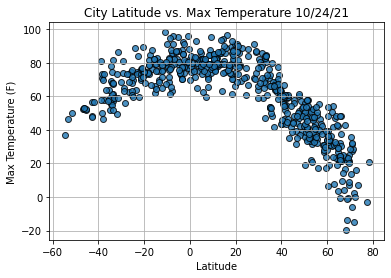

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

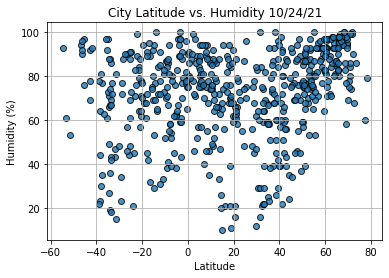

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

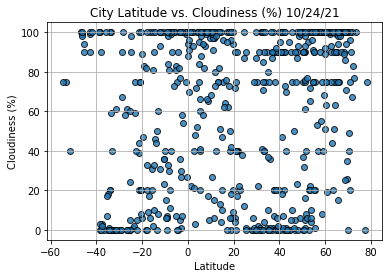

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

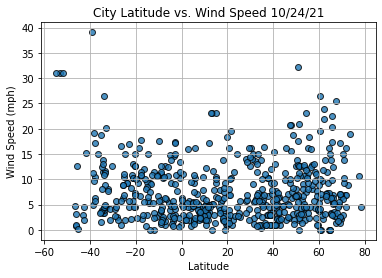

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()